In [102]:
import base64
import chardet
import pprint
import requests
from IPython import display

VIRASANA_URL = "http://10.68.64.12/virasana/"

In [103]:
def get_token(session, url):
    """Faz um get na url e tenta encontrar o csrf_token na resposta."""
    response = session.get(url)
    csrf_token = response.text
    begin = csrf_token.find('csrf_token"') + 10
    end = csrf_token.find('username"') - 10
    csrf_token = csrf_token[begin: end]
    begin = csrf_token.find('value="') + 7
    end = csrf_token.find('/>')
    csrf_token = csrf_token[begin: end]
    return csrf_token

def login(username, senha, session=None):
    """
    Autentica usuário no Servidor PADMA.

    Se não existir Usuário virasana, cria um com senha randômica
    """
    if session is None:
        session = requests.Session()
    url = VIRASANA_URL + '/login'
    csrf_token = get_token(session, url)
    print('token*********', csrf_token)
    r = session.post(
        url, data=dict(
            username=username,
            senha=senha,
            csrf_token=csrf_token)
    )
    return r, csrf_token


# Colocar seu usuário e senha abaixo!!!

In [104]:
s = requests.Session()
# Colocar seu usuário e senha abaixo!!!
username = 'ivan'
password = 'XXXX'
r, token = login(username, password, s)


token********* IjBmZDYyNDQyOTBjNjI2NWRmNmFmZjcwYzhlMmFhMWY0NzNhNmYwZmYi.XK9KpQ.cj_AwJYIsUVBKKgqcy8ZnSkpJLI" 


In [105]:
r

<Response [200]>

In [106]:
token

'IjBmZDYyNDQyOTBjNjI2NWRmNmFmZjcwYzhlMmFhMWY0NzNhNmYwZmYi.XK9KpQ.cj_AwJYIsUVBKKgqcy8ZnSkpJLI" '

# Realizando consulta no BD

In [107]:
r = requests.get(VIRASANA_URL + "grid_data", params={'metadata.numeroinformado': 'MRKU1105381'})
print(r.url)
print(r.text)

http://10.68.64.12/virasana/grid_data?metadata.numeroinformado=MRKU1105381
["5ca20ce7e450c2f8295d0052","5ca20ce7e450c2f8295d0054"]



In [108]:
lista_ids = list(r.json())

In [109]:
for _id in lista_ids:
    r = requests.get(VIRASANA_URL + "summary/%s" % _id)
    print(r.url)
    print(r.text)

http://10.68.64.12/virasana/summary/5ca20ce7e450c2f8295d0052
Número contêiner informado pelo recinto
MRKU1105381
Data de escaneamento
2019-03-31 00:12
Data de Carregamento da imagem no sistema
2019-04-01 13:06
Nome Recinto
BANDEIRANTES
Operação
lci - Importação
CONTÊINER COM CARGA

PESO TOTAL
29044.00
Conhecimento - Manifesto - Escala
CE 151905060477650 - 1519500547961 - 19000055248
Descrição
total number of packages:18 = 990 bags of polypropylene resin 480-hp90 ncm code: 39023000 wooden package: treated and certified freight prepaid *)tel: +55113
Consignatário
03529311000130 - mirvi brasil ltda.
Número contêiner - tara - peso - volume
mrku1105381 - 3700kg - 25344kg - 40m³
NCM
3902
Data e hora de atracação do Manifesto
30/03/2019 07:26:00
http://10.68.64.12/virasana/summary/5ca20ce7e450c2f8295d0054
Número contêiner informado pelo recinto
MRKU1105381
Data de escaneamento
2019-03-31 00:12
Data de Carregamento da imagem no sistema
2019-04-01 13:06
Nome Recinto
BANDEIRANTES
ERRO AO BUSCAR 

In [110]:
imgs = []
for _id in lista_ids:
    r = requests.get(VIRASANA_URL + "image/%s" % _id)
    print(r.url)
    print(r.status_code)
    print(r.text)
    imgs.append(r)

http://10.68.64.12/virasana/image/5ca20ce7e450c2f8295d0052
200
���� JFIF      �� C	
2!!22222222222222222222222222222222222222222222222222��  O " ��           	
�� �   } !1AQa"q2��#B��R��$3br�	
%&'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz���������������������������������������������������������������������������        	
�� �  w !1AQaq"2B����	#3R�br�
$4�%�&'()*56789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz��������������������������������������������������������������������������   ? ���� ��� �RO�z���On���7!�,�ͻn7}��?:����� �� aI?�TUs�Ĩ����R4w{�t����Z<����3/L��_�&�� 	6�H���4��Mpf��,/^�`6�	W�ǽ[��ӰO��p:��h�� ��J�������/� N>$�>`e�� d� �k��P�x��n�h��J�G�M	�YH�c��|uĪh�#�H� ]/>���4�G���K����� ��<�`��\��RKs*�Yc@�����=3�{K� ���4i��[I� ���5ʤ�̛�uu�Vȥޤ�gҀ:��M(��B9I� �ҏi��[I� ���5˓JO4�� �A�� �w����� H<E�2�[�G��� ���T���9\}h�oh`�mA�V� 
?�-п�

In [111]:
encode = chardet.detect(imgs[1].content)
print(encode)
pprint.pprint(bytes(imgs[1].content).decode(encode['encoding']))

{'encoding': 'UTF-16', 'confidence': 1.0, 'language': ''}
('<?xml version="1.0" ?>\r\n'
 '<ContainerArtifacts>\r\n'
 '  <Accession>20190331001</Accession>\r\n'
 '  <ScanTime>2019-03-31T00:12:51Z</ScanTime>\r\n'
 '  <ScannerId>Bandeirantes P45</ScannerId>\r\n'
 '  <ScannerMake>Rapiscan</ScannerMake>\r\n'
 '  <ScannerModel>P45</ScannerModel>\r\n'
 '  <ScannerSerial>1</ScannerSerial>\r\n'
 '  <ContainerID1>MRKU1105381</ContainerID1>\r\n'
 '  <ContainerID2></ContainerID2>\r\n'
 '  <Comments></Comments>\r\n'
 '</ContainerArtifacts>\r\n')


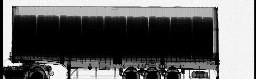

In [113]:
display.Image(imgs[0].content)

http://10.68.64.12/virasana/mini1/5ca20ce7e450c2f8295d0052


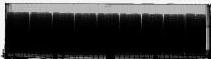

In [114]:
r = requests.get(VIRASANA_URL + "mini1/%s" % lista_ids[0])
print(r.url)
display.Image(r.content)

In [115]:
r = requests.get(VIRASANA_URL + "mini2/%s" % lista_ids[0])
print(r.url)
display.Image(r.content)

http://10.68.64.12/virasana/mini2/5ca20ce7e450c2f8295d0052


In [116]:
r = requests.get(VIRASANA_URL + "json/%s" % lista_ids[0])
print(r.url)
pprint.pprint(r.json())

http://10.68.64.12/virasana/json/5ca20ce7e450c2f8295d0052
{'UNIDADE': 'ALFSTS\n',
 'alertapeso': False,
 'carga': {'atracacao': {'_id': {'$oid': '5ca2645ce450c274e571ef67'},
                         'codigoterminal': 'brssz016',
                         'dataatracacao': '30/03/2019',
                         'dataatracacaoiso': {'$date': 1553930760000},
                         'datadesatracacao': '31/03/2019',
                         'escala': '19000055248',
                         'horaatracacao': '07:26:00',
                         'horadesatracacao': '06:58:00',
                         'localatracacao': 'tc3',
                         'nometerminal': 'santos brasil',
                         'situacao': 'atracada'},
           'conhecimento': [{'_id': {'$oid': '5ca26420e450c274e570e30e'},
                             'codigoagentenavegacao': '02427026000146',
                             'codigoportodestino': 'brssz',
                             'codigoportoorigem': 'beanr',
 

## Pegando várias imagens

In [117]:
from datetime import datetime, time
dataaprocurar = datetime(2019, 3, 1)
datafim = datetime.combine(dataaprocurar, time.max)
print(dataaprocurar, datafim)

filtro = {
    #'metadata.contentType': 'imagem/jpeg',
    'metadata.recinto': 'BANDEIRANTES',
    'metadata.carga.atracacao.escala': '19000055248',
   #'metadata.dataescaneamento':
   #{'$gt': dataaprocurar, '$lt': datafim}
}

# 
r = requests.get(VIRASANA_URL + "grid_data", params=filtro)
print(r.url)
print(r.text)

2019-03-01 00:00:00 2019-03-01 23:59:59.999999
http://10.68.64.12/virasana/grid_data?metadata.recinto=BANDEIRANTES&metadata.carga.atracacao.escala=19000055248
["5ca20ce6e450c2f8295cfe5e","5ca20ce6e450c2f8295cfe66","5ca20ce7e450c2f8295cffe2","5ca20ce7e450c2f8295cffea","5ca20ce7e450c2f8295cffee","5ca20ce7e450c2f8295cfff2","5ca20ce7e450c2f8295cfff6","5ca20ce7e450c2f8295d0052","5ca20ce7e450c2f8295d005a","5ca20ce8e450c2f8295d01d0","5ca20ce9e450c2f8295d03f0","5ca20ce9e450c2f8295d03f4","5ca20cf7e450c2f8295d0759","5ca20cf8e450c2f8295d080b","5ca20cf8e450c2f8295d0817","5ca20cf9e450c2f8295d0aff","5ca20cf9e450c2f8295d0b13","5ca20cf9e450c2f8295d0b27","5ca20cfae450c2f8295d0c0b","5ca20d08e450c2f8295d0e72","5ca20d08e450c2f8295d0f12","5ca20d1be450c2f8295d16af","5ca20d1ce450c2f8295d182d","5ca20d1ce450c2f8295d1831","5ca20d1ce450c2f8295d1835","5ca20d1ce450c2f8295d197d","5ca20d1ce450c2f8295d1981","5ca20d1ce450c2f8295d1985","5ca20d1ce450c2f8295d1989","5ca20d1de450c2f8295d1acd","5ca358cbe450c2f8295d1c8b","5c

In [118]:
lista_ids = list(r.json())


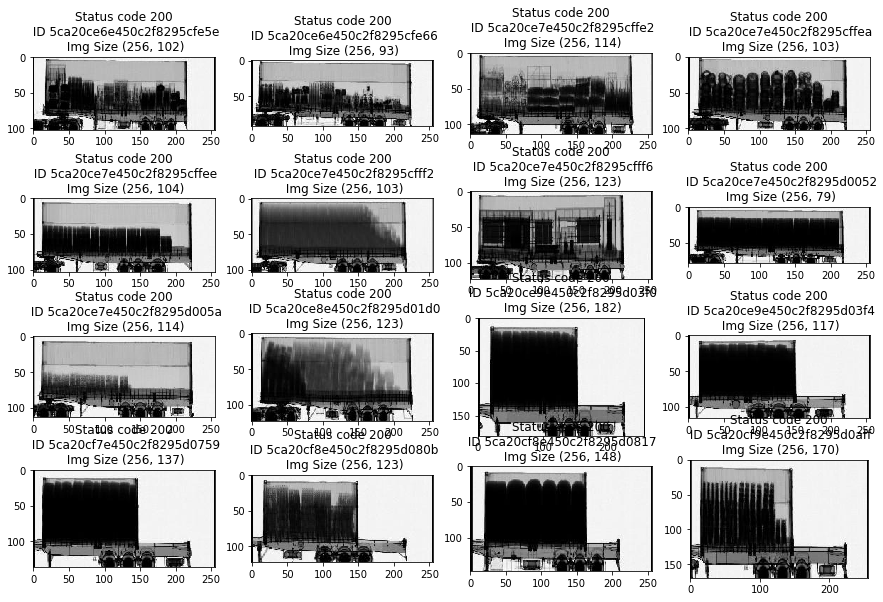

In [119]:
%matplotlib inline
import io
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(15, 10))
for i, _id in enumerate(lista_ids[:16]):
    r = requests.get(VIRASANA_URL + "image/%s" % _id)
    pil_img = Image.open(io.BytesIO(r.content))
    plt.subplot(4, 4, i + 1)
    plt.title('Status code %s\n ID %s\n Img Size %s' % (r.status_code, _id, pil_img.size))
    plt.imshow(pil_img)


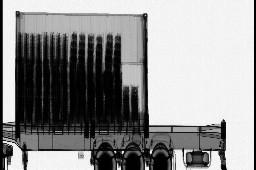

In [120]:
pil_img